In [231]:
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

# 1- ُ Exploratory Data Analysis

In [232]:
df1 = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
len(df1)

7043

In [233]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* Columns in DataFrame
    * customerID :  Customer ID
    * gender :  Whether the customer is a male or a female
    * SeniorCitizen :  Whether the customer is a senior citizen or not (1, 0)
    * Partner :  Whether the customer has a partner or not (Yes, No)
    * Dependents :  Whether the customer has dependents or not (Yes, No)
    * tenure :  Number of months the customer has stayed with the company
    * PhoneService :  Whether the customer has a phone service or not (Yes, No)
    * MultipleLines :  Whether the customer has multiple lines or not (Yes, No, No phone service)
    * InternetService :  Customer’s internet service provider (DSL, Fiber optic, No)
    * OnlineSecurity :  Whether the customer has online security or not (Yes, No, No internet service)
    * OnlineBackup :  Whether the customer has online backup or not (Yes, No, No internet service)
    * DeviceProtection :  Whether the customer has device protection or not (Yes, No, No internet service)
    * TechSupport :  Whether the customer has tech support or not (Yes, No, No internet service)
    * StreamingTV :  Whether the customer has streaming TV or not (Yes, No, No internet service)
    * StreamingMovies :  Whether the customer has streaming movies or not (Yes, No, No internet service)
    * Contract :  The contract term of the customer (Month-to-month, One year, Two year)
    * PaperlessBilling :  Whether the customer has paperless billing or not (Yes, No)
    * PaymentMethod :  The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    * MonthlyCharges :  The amount charged to the customer monthly
    * TotalCharges :  The total amount charged to the customer
    * Churn :  Whether the customer churned or not (Yes or No)

In [234]:
len(df1.columns)

21

In [235]:
df1.shape

(7043, 21)

In [236]:
print(f" Number of columns: {len(df1.columns)}")
print(f" Names of Columns: {df1.columns}")

 Number of columns: 21
 Names of Columns: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [237]:
df1.columns = df1.columns.str.lower()
df1.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [238]:
# display the frequencies for columns
df1.count()

customerid          7043
gender              7043
seniorcitizen       7043
partner             7043
dependents          7043
tenure              7043
phoneservice        7043
multiplelines       7043
internetservice     7043
onlinesecurity      7043
onlinebackup        7043
deviceprotection    7043
techsupport         7043
streamingtv         7043
streamingmovies     7043
contract            7043
paperlessbilling    7043
paymentmethod       7043
monthlycharges      7043
totalcharges        7043
churn               7043
dtype: int64

In [239]:
# descriptive statistics for data
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,"7,043.00",0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,"7,043.00",32.37,24.56,0.00,9.00,29.00,55.00,72.00
monthlycharges,"7,043.00",64.76,30.09,18.25,35.50,70.35,89.85,118.75


In [240]:
print('Known observations: {}\nUnique observations: {}'
      .format(len(df1.index),len(df1.drop_duplicates().index)))

Known observations: 7043
Unique observations: 7043


No duplicates Found !

In [241]:
for col in df1.columns:
    print( col,':', df1[col].nunique() )
    #most 5 freq
    print(df1[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

customerid : 7043
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
Name: customerid, dtype: int64

********************

gender : 2
Male      3555
Female    3488
Name: gender, dtype: int64

********************

seniorcitizen : 2
0    5901
1    1142
Name: seniorcitizen, dtype: int64

********************

partner : 2
No     3641
Yes    3402
Name: partner, dtype: int64

********************

dependents : 2
No     4933
Yes    2110
Name: dependents, dtype: int64

********************

tenure : 73
1     613
72    362
2     238
3     200
4     176
Name: tenure, dtype: int64

********************

phoneservice : 2
Yes    6361
No      682
Name: phoneservice, dtype: int64

********************

multiplelines : 3
No                  3390
Yes                 2971
No phone service     682
Name: multiplelines, dtype: int64

********************

internetservice : 3
Fiber optic    3096
DSL            2421
No             1526
Name: internetservice, dtype: int64

******

In [242]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


totalcharge in string!! to convarte it to float: we shulde hundle all missing value first

# 2- Data Cleaning

In [243]:
df = df1.copy()

In [244]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [245]:
def convert_to(x, output_type=float):
  if x == ' ':
    return 0.0
  else:
    return output_type(x)

In [246]:
#convarte totalcharges from string to float
df['totalcharges'] = df['totalcharges'].apply(convert_to)

In [247]:
#column
df.columns = df.columns.str.lower()


#inside column
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
print(string_columns)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

['customerid', 'gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'churn']


In [248]:
#rename columns
df.rename(columns = {'monthlycharges': 'salary'}, inplace = True)
df.rename(columns = {'totalcharges': 'totalsalary'}, inplace = True)

In [249]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,salary,totalsalary,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,"1,889.50",no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,"1,840.75",no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


# 2.1 - Exploratory Data Analysis

In [251]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,seniorcitizen,tenure,salary,totalsalary
count,"7,043.00","7,043.00","7,043.00","7,043.00"
mean,0.16,32.37,64.76,"2,279.73"
std,0.37,24.56,30.09,"2,266.79"
min,0.00,0.00,18.25,0.00
25%,0.00,9.00,35.50,398.55
50%,0.00,29.00,70.35,"1,394.55"
75%,0.00,55.00,89.85,"3,786.60"
max,1.00,72.00,118.75,"8,684.80"


In [252]:
df.describe(include=['O'])

,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-vhveg,male,no,no,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,no
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


/tmp/ipykernel_32/4111256728.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tenure'])
/tmp/ipykernel_32/4111256728.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary'])
/tmp/ipykernel_32/4111256728.py:15: UserWarning: 

`distplot` is a deprecated function and will be remove

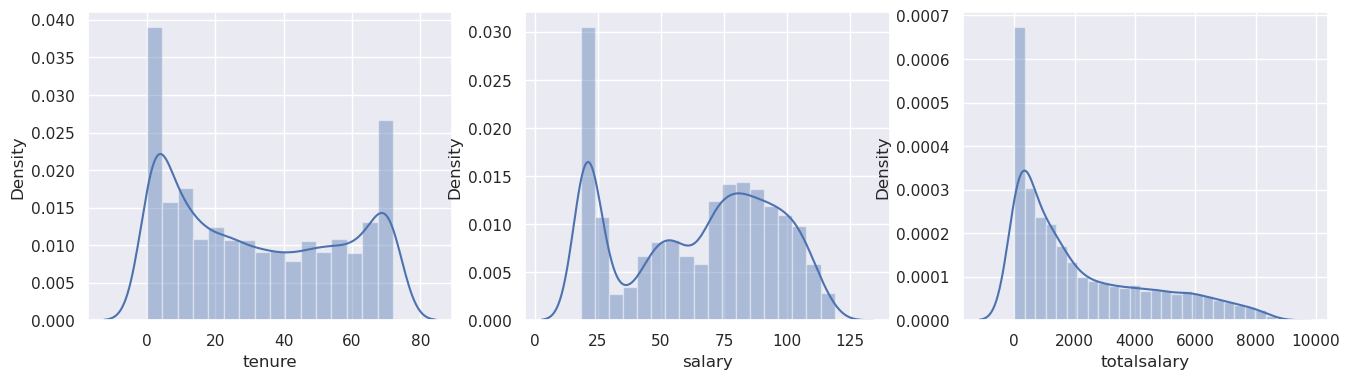

In [253]:
#check the distribution of numerical features.
# Create a figure with 1 row and 4 columns
plt.figure(figsize=(16,4))

# Create first subplot
plt.subplot(1,3,1)
sns.distplot(df['tenure'])

# Create second subplot
plt.subplot(1,3,2)
sns.distplot(df['salary'])

# Create third subplot
plt.subplot(1,3,3)
sns.distplot(df['totalsalary'])

# Show the plot
plt.show()

<Axes: >

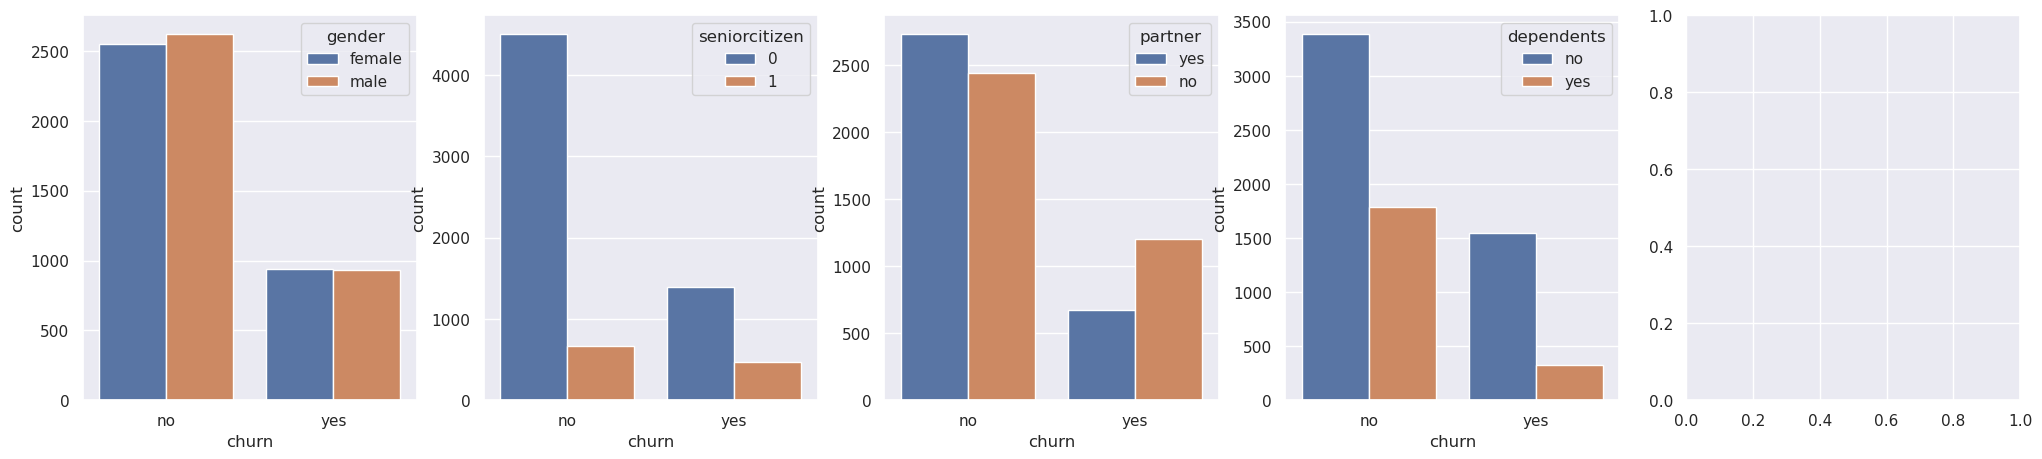

In [254]:
# Now we check distribution of categorical features.
plt.figure(figsize=(25,5))
plt.subplot(151)
sns.countplot(df, x='churn', hue='gender');
plt.subplot(152)
sns.countplot(df, x='churn', hue='seniorcitizen');
plt.subplot(153)
sns.countplot(df, x='churn', hue='partner');
plt.subplot(154)
sns.countplot(df, x='churn', hue='dependents');
plt.subplot(155)

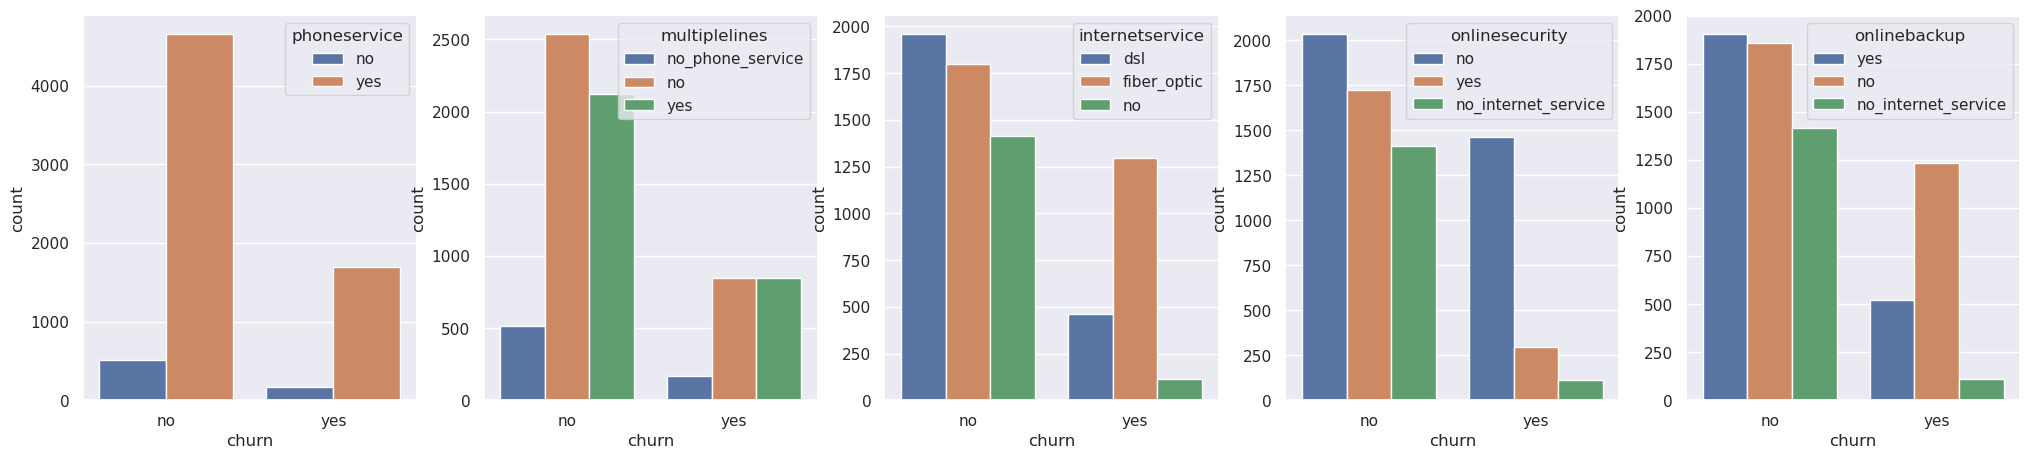

In [255]:


# Now we check distribution of categorical features.
plt.figure(figsize=(25,5))
plt.subplot(151)
sns.countplot(df, x='churn', hue='phoneservice');
plt.subplot(152)
sns.countplot(df, x='churn', hue='multiplelines');
plt.subplot(153)
sns.countplot(df, x='churn', hue='internetservice');
plt.subplot(154)
sns.countplot(df, x='churn', hue='onlinesecurity');
plt.subplot(155)
sns.countplot(df, x='churn', hue='onlinebackup');

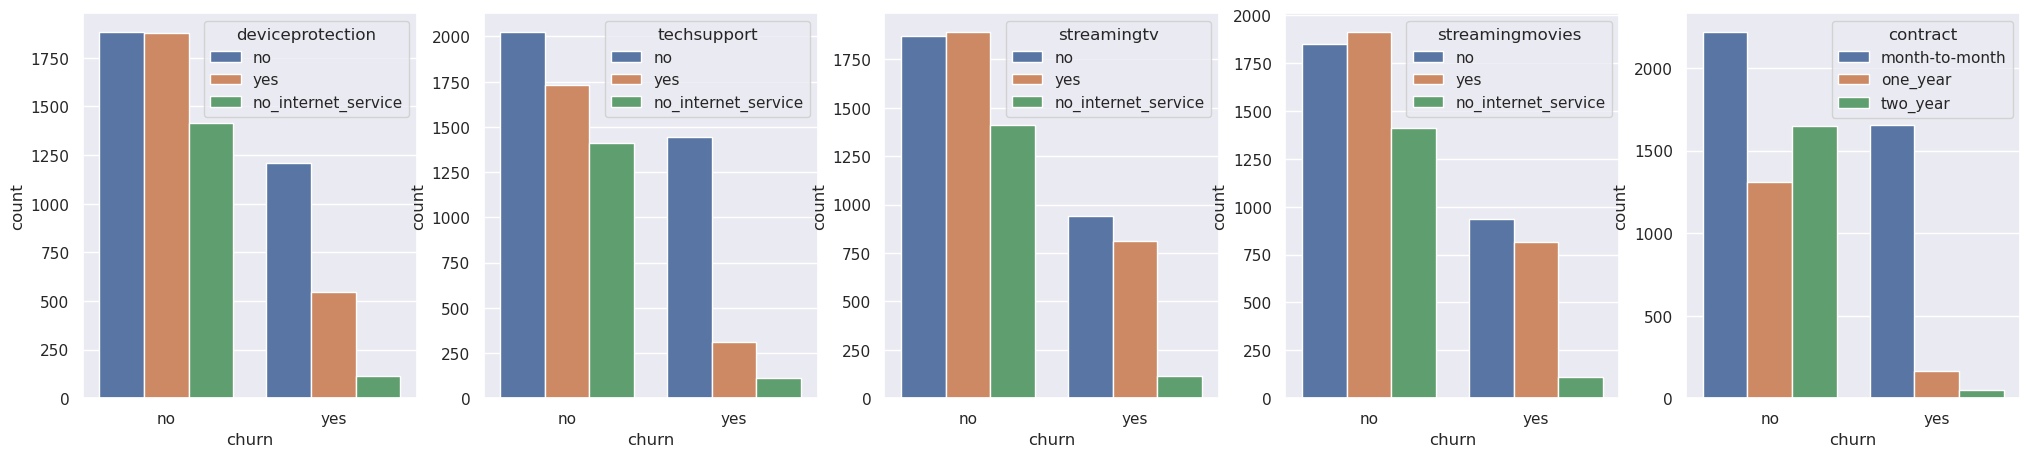

In [256]:
# Now we check distribution of categorical features.
plt.figure(figsize=(25,5))
plt.subplot(151)
sns.countplot(df, x='churn', hue='deviceprotection');
plt.subplot(152)
sns.countplot(df, x='churn', hue='techsupport');
plt.subplot(153)
sns.countplot(df, x='churn', hue='streamingtv');
plt.subplot(154)
sns.countplot(df, x='churn', hue='streamingmovies');
plt.subplot(155)
sns.countplot(df, x='churn', hue='contract');

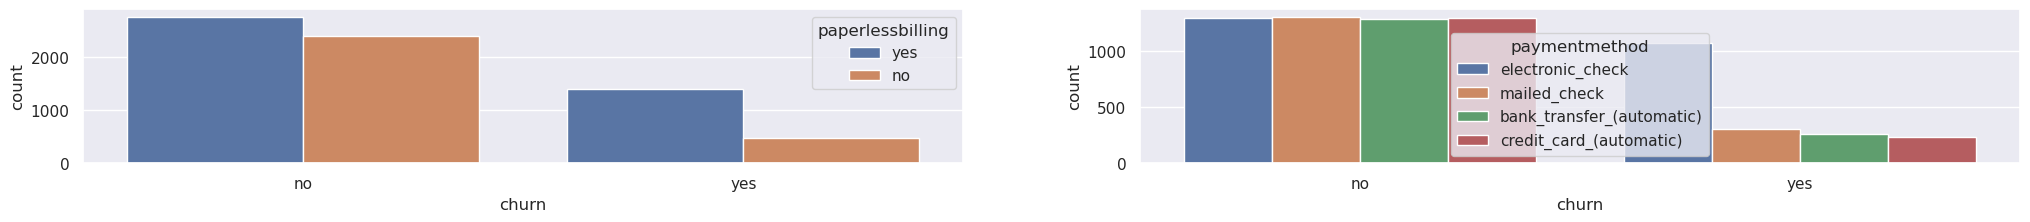

In [257]:
# Now we check distribution of categorical features.
plt.figure(figsize=(25,2))
plt.subplot(121)
sns.countplot(df, x='churn', hue='paperlessbilling');
plt.subplot(122)
sns.countplot(df, x='churn', hue='paymentmethod');


# 2.2 - Check missing values

In [258]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
salary              0
totalsalary         0
churn               0
dtype: int64

there is no missing data

# 3 - Data Processing

# 3.1 - Target variable analysis (churn)

In [259]:
df.churn.value_counts()

no     5174
yes    1869
Name: churn, dtype: int64

imbalanced dataset , we can not use accuracy to evaluate the model

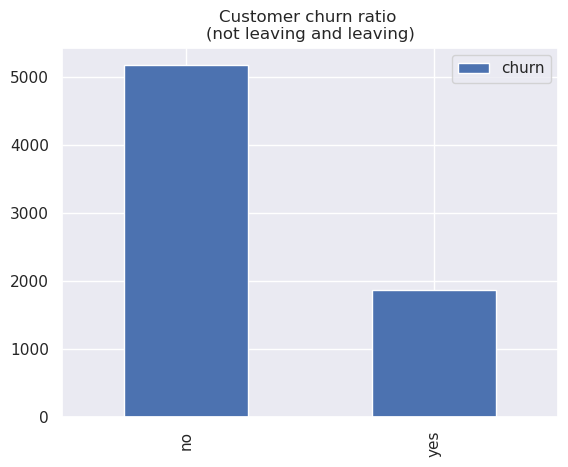

In [260]:
#plot without normlization
(df.churn.value_counts()).plot.bar()
plt.title('Customer churn ratio \n(not leaving and leaving)')
plt.legend();

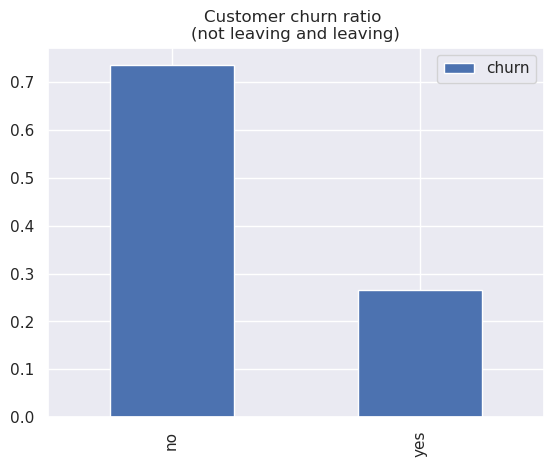

In [261]:
#plot with normlization
(df.churn.value_counts(normalize=True)).plot.bar()
plt.title('Customer churn ratio \n(not leaving and leaving)')
plt.legend();

In [262]:
df['churn'] = df['churn'].replace({'yes': 1, 'no': 0})

# 3.2 - Improved Features

In [263]:
# find class each column
def see_unique_obj_col():
    for col_name in df.columns:
        print(f'{col_name}: {df[col_name].unique()}')
            
see_unique_obj_col()

customerid: ['7590-vhveg' '5575-gnvde' '3668-qpybk' ... '4801-jzazl' '8361-ltmkd'
 '3186-ajiek']
gender: ['female' 'male']
seniorcitizen: [0 1]
partner: ['yes' 'no']
dependents: ['no' 'yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
phoneservice: ['no' 'yes']
multiplelines: ['no_phone_service' 'no' 'yes']
internetservice: ['dsl' 'fiber_optic' 'no']
onlinesecurity: ['no' 'yes' 'no_internet_service']
onlinebackup: ['yes' 'no' 'no_internet_service']
deviceprotection: ['no' 'yes' 'no_internet_service']
techsupport: ['no' 'yes' 'no_internet_service']
streamingtv: ['no' 'yes' 'no_internet_service']
streamingmovies: ['no' 'yes' 'no_internet_service']
contract: ['month-to-month' 'one_year' 'two_year']
paperlessbilling: ['yes' 'no']
paymentmethod: ['electronic_check' 'mailed_check' 'bank_transfer_(automatic)

In [264]:
# Grouping some value in the same or similar meaning for eliminating redundancy
# see df.unique() above for replace it

df.replace({'no_phone_service': 'no'}, inplace=True)

df.replace({'no_internet_service': 'no'}, inplace=True)

In [307]:
df2 = df.copy()

In [309]:
df2.replace({'yes': 1}, inplace=True)

df2.replace({'no': 0}, inplace=True)

In [265]:
see_unique_obj_col()

customerid: ['7590-vhveg' '5575-gnvde' '3668-qpybk' ... '4801-jzazl' '8361-ltmkd'
 '3186-ajiek']
gender: ['female' 'male']
seniorcitizen: [0 1]
partner: ['yes' 'no']
dependents: ['no' 'yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
phoneservice: ['no' 'yes']
multiplelines: ['no' 'yes']
internetservice: ['dsl' 'fiber_optic' 'no']
onlinesecurity: ['no' 'yes']
onlinebackup: ['yes' 'no']
deviceprotection: ['no' 'yes']
techsupport: ['no' 'yes']
streamingtv: ['no' 'yes']
streamingmovies: ['no' 'yes']
contract: ['month-to-month' 'one_year' 'two_year']
paperlessbilling: ['yes' 'no']
paymentmethod: ['electronic_check' 'mailed_check' 'bank_transfer_(automatic)'
 'credit_card_(automatic)']
salary: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
totalsalary: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
chur

In [266]:
df.drop(['customerid'], axis=1) 

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,salary,totalsalary,churn
0,female,0,yes,no,1,no,no,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,"1,889.50",0
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,male,0,no,no,45,no,no,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,"1,840.75",0
4,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,male,0,yes,yes,24,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,"1,990.50",0
7039,female,0,yes,yes,72,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,"7,362.90",0
7040,female,0,yes,yes,11,no,no,dsl,yes,no,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,0
7041,male,1,yes,no,4,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.60,1


In [267]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object' and c != 'churn']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']
print('List of categorical columns: {:}.\n \nList of numerical: {:}'.format(categorical_columns, numerical_columns))

List of categorical columns: ['customerid', 'gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod'].
 
List of numerical: ['seniorcitizen', 'tenure', 'salary', 'totalsalary', 'churn']


In [268]:
df[numerical_columns].corr() # Check linear dependence

,seniorcitizen,tenure,salary,totalsalary,churn
seniorcitizen,1.00,0.02,0.22,0.10,0.15
tenure,0.02,1.00,0.25,0.83,-0.35
salary,0.22,0.25,1.00,0.65,0.19
totalsalary,0.10,0.83,0.65,1.00,-0.20
churn,0.15,-0.35,0.19,-0.20,1.00


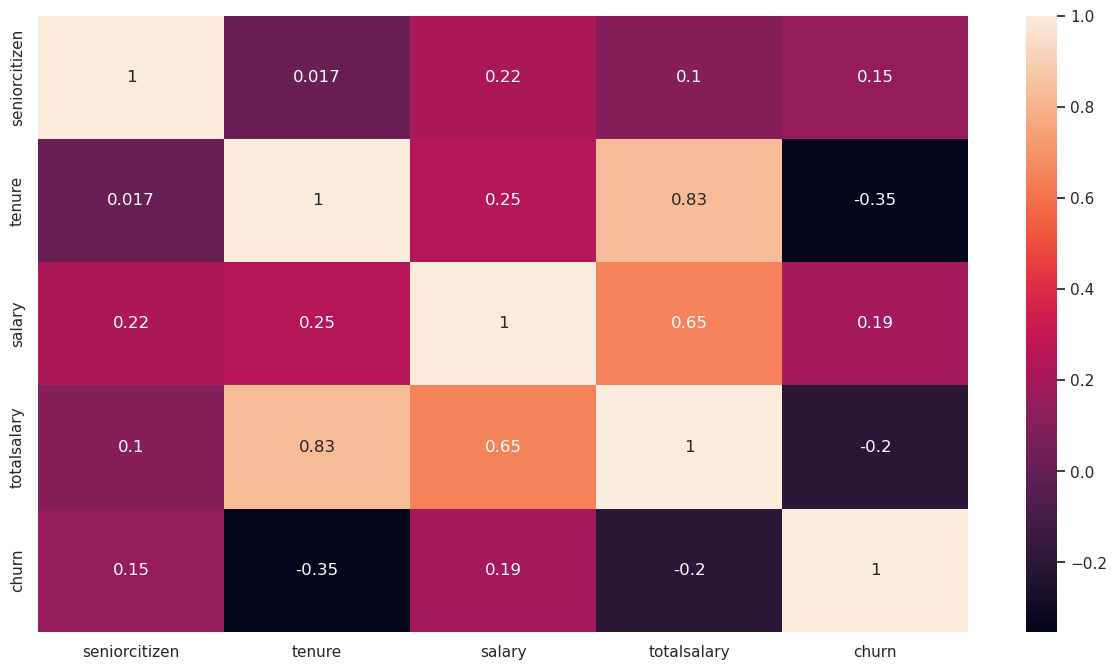

In [269]:
plt.figure(figsize=(15,8))
_=sns.heatmap(df[numerical_columns].corr(), annot = True)

/tmp/ipykernel_32/2989668568.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  _=sns.heatmap(df2.corr(), annot = True)


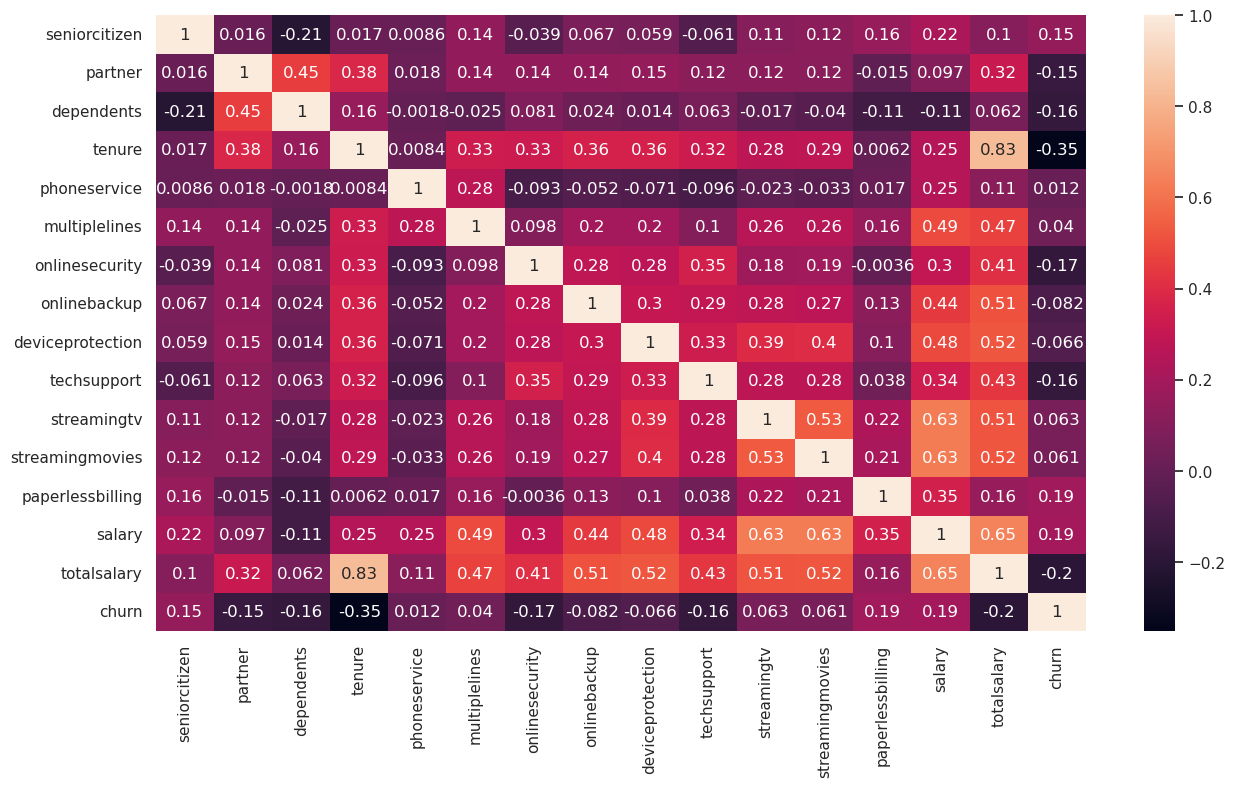

In [311]:
plt.figure(figsize=(15,8))
_=sns.heatmap(df2.corr(), annot = True)

In [270]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,salary,totalsalary,churn
0,7590-vhveg,female,0,yes,no,1,no,no,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,"1,889.50",0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,"1,840.75",0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


In [271]:
# define the input features (`X`) and target variable (`y`)
X = df.drop('churn', axis=1)
y = df['churn']

In [272]:
# first, convert the categorical columns to type `category`
for col in X[categorical_columns]:
    X[col] = X[col].astype('category')
    
# then, use pandas' `get_dummies` function to one-hot encode the categorical columns
df_encoded = pd.get_dummies(X[categorical_columns], columns=categorical_columns)

In [273]:
df_encoded.head()

,customerid_0002-orfbo,customerid_0003-mknfe,customerid_0004-tlhlj,customerid_0011-igkff,customerid_0013-exchz,customerid_0013-mhzwf,customerid_0013-smeoe,customerid_0014-bmaqu,customerid_0015-uocoj,customerid_0016-qljis,...,streamingmovies_yes,contract_month-to-month,contract_one_year,contract_two_year,paperlessbilling_no,paperlessbilling_yes,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [274]:
# drop the original categorical columns from `df`
X = df.drop(categorical_columns, axis=1)

# concatenate the one-hot encoded columns with `df`
X = pd.concat([X, df_encoded], axis=1)

In [275]:
X.head()

,seniorcitizen,tenure,salary,totalsalary,churn,customerid_0002-orfbo,customerid_0003-mknfe,customerid_0004-tlhlj,customerid_0011-igkff,customerid_0013-exchz,...,streamingmovies_yes,contract_month-to-month,contract_one_year,contract_two_year,paperlessbilling_no,paperlessbilling_yes,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check
0,0,1,29.85,29.85,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,"1,889.50",0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,"1,840.75",0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [276]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 7082 entries, seniorcitizen to paymentmethod_mailed_check
dtypes: float64(2), int64(3), uint8(7077)
memory usage: 47.8 MB


In [278]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: churn
Non-Null Count  Dtype
--------------  -----
7043 non-null   int64
dtypes: int64(1)
memory usage: 55.1 KB


# 4 - 15+ questions and answers with visualization

Q1:  How does tenure(i.e. length of time as a customer) affect churn rate?

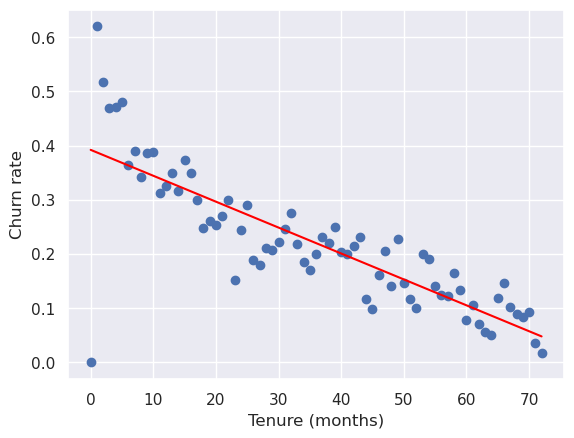

In [281]:
# calculate churn rate by tenure
tenure_churn = df.groupby('tenure')['churn'].mean().reset_index()

# create scatter plot with trend line
plt.scatter(tenure_churn['tenure'], tenure_churn['churn'])

# calculate trend line
x = tenure_churn['tenure']
y = tenure_churn['churn']
slope, intercept = np.polyfit(x, y, 1)

# add trend line to plot
plt.plot(x, slope*x + intercept, color='red')

plt.xlabel('Tenure (months)')
plt.ylabel('Churn rate')
plt.show()

Q2: Are customers who have phone service more likely to churn thanthose who don't?

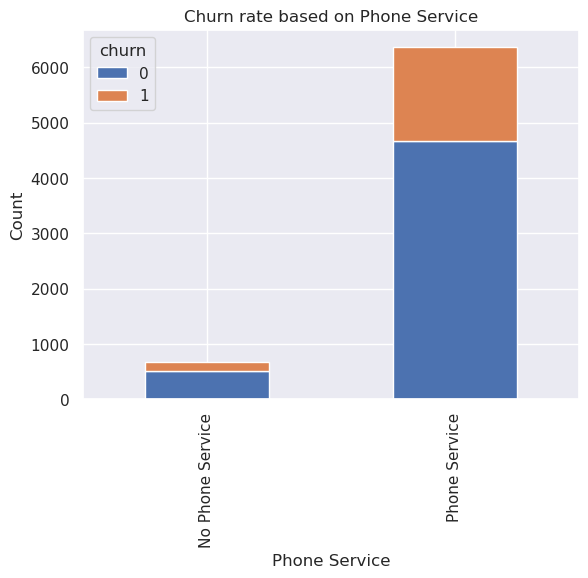

In [282]:
# Visualize the relationship between the target variable and phone service
phone_churn = df.groupby(['phoneservice', 
'churn'])['churn'].count().unstack()
ax3 = phone_churn.plot(kind='bar', stacked=True)
ax3.set_title('Churn rate based on Phone Service')
ax3.set_xlabel('Phone Service')
ax3.set_ylabel('Count')
ax3.set_xticklabels(['No Phone Service', 'Phone Service'])
plt.savefig('phone_churn.png')
plt.show()


Q3: How does having multiple phone lines affect churn rate?

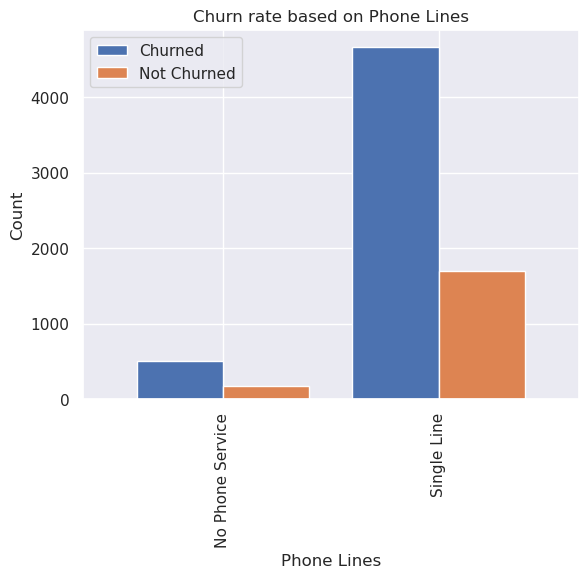

In [283]:
import matplotlib.pyplot as plt

# create bar chart
ax = phone_churn.plot(kind='bar', stacked=False, width=0.8)

# set chart title and axis labels
ax.set_title('Churn rate based on Phone Lines')
ax.set_xlabel('Phone Lines')
ax.set_ylabel('Count')

# set x-axis tick labels
ax.set_xticklabels(['No Phone Service', 'Single Line'])

# add legend
ax.legend(['Churned', 'Not Churned'], loc='upper left')

# show chart
plt.show()

Q4: Are customers who have streaming TV or movies more or less likely to churn?

Q5: How does the type of contract (month-to-month, one year, or two year) affect churn rate?


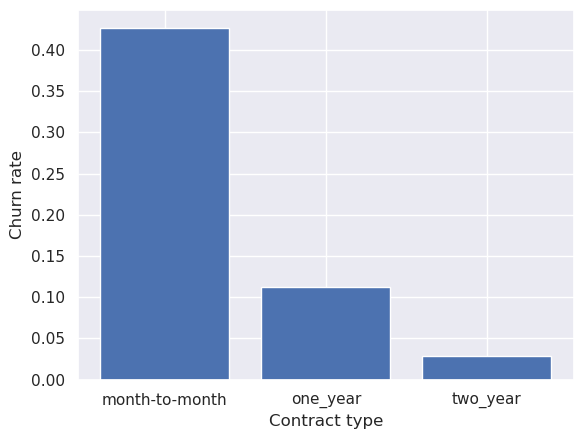

In [289]:
# calculate churn rate by contract type
contract_churn = df.groupby('contract')['churn'].mean().reset_index()

# create bar chart
plt.bar(contract_churn['contract'], contract_churn['churn'])
plt.xlabel('Contract type')
plt.ylabel('Churn rate')
# save the chart as an image file
plt.savefig('churn_rate_chart.png')
plt.show()

Q6: How does the payment method (Electronic check,Mailed check,Bank transfer, or Credit card)


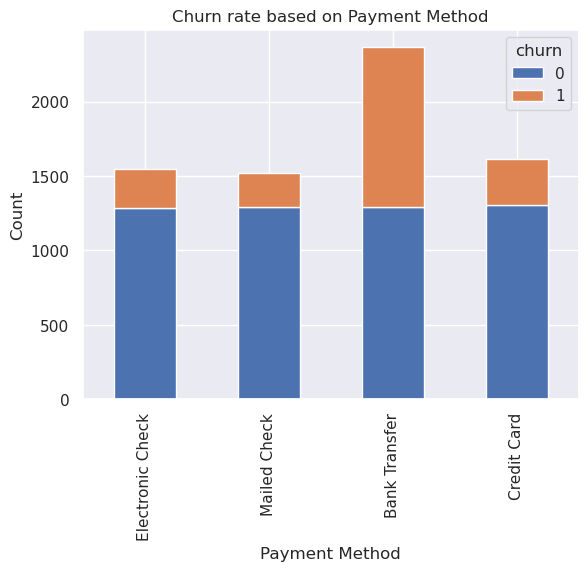

In [290]:
# Visualize the relationship between the target variable and payment method
payment_churn = df.groupby(['paymentmethod', 
'churn'])['churn'].count().unstack()
ax2 = payment_churn.plot(kind='bar', stacked=True)
ax2.set_title('Churn rate based on Payment Method')
ax2.set_xlabel('Payment Method')
ax2.set_ylabel('Count')
ax2.set_xticklabels(['Electronic Check', 'Mailed Check', 'Bank Transfer', 
'Credit Card'])
plt.savefig('payment_churn.png')
plt.show()

Q7 : Are customers who use paperless billing more or less likely to churn than those who don't?

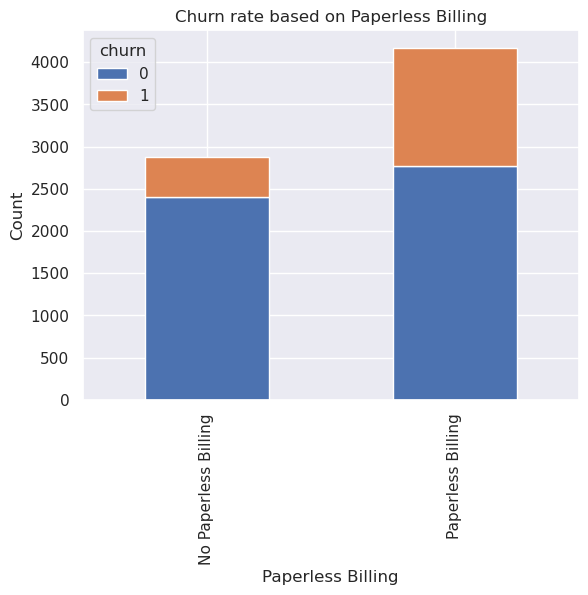

In [291]:
paperless_churn = df.groupby(['paperlessbilling', 'churn'])['churn'].count().unstack()
ax3 = paperless_churn.plot(kind='bar', stacked=True)
ax3.set_title('Churn rate based on Paperless Billing')
ax3.set_xlabel('Paperless Billing')
ax3.set_ylabel('Count')
ax3.set_xticklabels(['No Paperless Billing', 'Paperless Billing'])
plt.savefig('paperless_churn.png')


Q8 : Are customers who have fiber optic internet service more likely to churn than those who have DSL or no internet service?


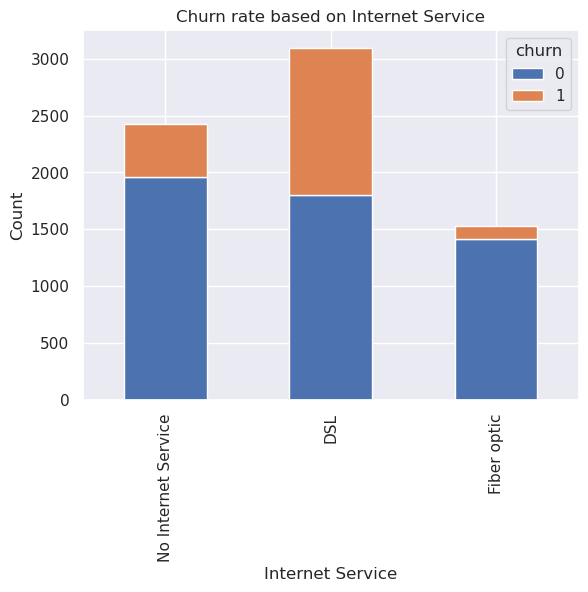

In [292]:
internet_churn = df.groupby(['internetservice', 'churn'])['churn'].count().unstack()
ax5 = internet_churn.plot(kind='bar', stacked=True)
ax5.set_title('Churn rate based on Internet Service')
ax5.set_xlabel('Internet Service')
ax5.set_ylabel('Count')
ax5.set_xticklabels(['No Internet Service', 'DSL', 'Fiber optic'])
plt.savefig('internet_churn.png')


Q9 :  Are customers who have a partner and dependents more or less likely to churn than those who have either a partner or dependents?


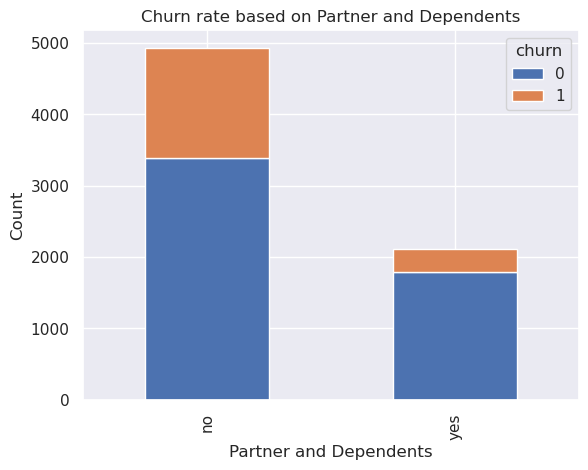

In [293]:
partner_dependents_churn = df.groupby(['dependents', 'churn'])['churn'].count().unstack()
ax4 = partner_dependents_churn.plot(kind='bar', stacked=True)
ax4.set_title('Churn rate based on Partner and Dependents')
ax4.set_xlabel('Partner and Dependents')
ax4.set_ylabel('Count')
plt.savefig('partner_dependents_churn.png')

Q10: How does having senior citizen status affect the churn rate for customers who have a fiber optic internet service?

Q11: How does the monthly charge and total charge vary by tenure and churn status?


Q12: How does the churn rate vary by contract type and paperless billing?


Q13: How does having tech support affect the churn rate?

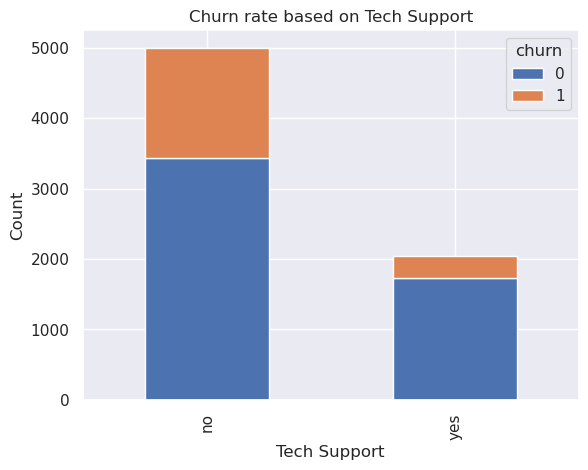

In [296]:
# Visualize the relationship between the target variable and tech support
tech_support_churn = df.groupby(['techsupport', 'churn'])['churn'].count().unstack()
ax1 = tech_support_churn.plot(kind='bar', stacked=True)
ax1.set_title('Churn rate based on Tech Support')
ax1.set_xlabel('Tech Support')
ax1.set_ylabel('Count')
plt.savefig('tech_support_churn.png')
plt.show()

Q14: How does the churn rate vary by tenure for customers who have a two-year contract and paperless billing?


Q15: Is there a correlation between monthly charges and total charges?

# 5- Feature Engineering

In [297]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,salary,totalsalary,churn
0,7590-vhveg,female,0,yes,no,1,no,no,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,"1,889.50",0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,"1,840.75",0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


In [299]:
# define the input features (`X`) and target variable (`y`)
X = df.drop('churn', axis=1)
X = df.drop('streamingmovies', axis=1)
X = df.drop('streamingmovies', axis=1)
y = df['churn']

In [300]:
# first, convert the categorical columns to type `category`
for col in X[categorical_columns]:
    X[col] = X[col].astype('category')
    
# then, use pandas' `get_dummies` function to one-hot encode the categorical columns
df_encoded = pd.get_dummies(X[categorical_columns], columns=categorical_columns)

In [301]:
df_encoded.head()

,customerid_0002-orfbo,customerid_0003-mknfe,customerid_0004-tlhlj,customerid_0011-igkff,customerid_0013-exchz,customerid_0013-mhzwf,customerid_0013-smeoe,customerid_0014-bmaqu,customerid_0015-uocoj,customerid_0016-qljis,...,streamingmovies_yes,contract_month-to-month,contract_one_year,contract_two_year,paperlessbilling_no,paperlessbilling_yes,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [302]:
# drop the original categorical columns from `df`
X = df.drop(categorical_columns, axis=1)

# concatenate the one-hot encoded columns with `df`
X = pd.concat([X, df_encoded], axis=1)

In [303]:
X.head()

,seniorcitizen,tenure,salary,totalsalary,churn,customerid_0002-orfbo,customerid_0003-mknfe,customerid_0004-tlhlj,customerid_0011-igkff,customerid_0013-exchz,...,streamingmovies_yes,contract_month-to-month,contract_one_year,contract_two_year,paperlessbilling_no,paperlessbilling_yes,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check
0,0,1,29.85,29.85,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,"1,889.50",0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,"1,840.75",0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [304]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 7082 entries, seniorcitizen to paymentmethod_mailed_check
dtypes: float64(2), int64(3), uint8(7077)
memory usage: 47.8 MB


In [305]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: churn
Non-Null Count  Dtype
--------------  -----
7043 non-null   int64
dtypes: int64(1)
memory usage: 55.1 KB


# 6- Prediction

## Model building and selection


# 6.1. Splitting Data into training and testing data ( Data processing )

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Print the shape
print("shape of training set :", X_train.shape, y_train.shape)
print("shape of testing set :", X_test.shape, y_test.shape)

# 6.2. Train & Evaluate SVM model 

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 6.3. Improve model performance

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = lr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))

In [ ]:
# Compute the ROC curve and AUC
y_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()